# Analyse der HANA - SSBM Benchmark Log Dateien

## Einstellungen

Bitte passen sie die Einstellungen bei Bedarf an.

In [126]:
from util import Analyser
LOG_PATH_ROOT="../../../ssbm/"
analyser = Analyser(LOG_PATH_ROOT + "12gb6cores.log")

## Allgemein:
Im folgenden wird die allgemeine Laufzeit des Benchmarks analysiert
mit folgenden Testspezifikationen

Wiederholungen:

In [127]:
print(analyser.get_repetitions())

250


CPU: Intel i7 4.2ghz

CPU Kerne: 6

RAM: 8GB

### Zeilenbasiert
Im folgenden wird die allgemeine Laufzeit des Benchmarks
bei einem zeilenbasierten Schmata betrachted.

In [128]:
benchmark = analyser.get_row_benchmark()
benchmark.print_stats()

||Time in usec|
|--|--|
|Samples|250|
|Average|3440525|
|Min|3309376|
|Max|3783572|
|Median|3426630|
|Standard Deviation|67142|
|Total|860131368|

Table: General Data - Row Benchmark


## Spaltenbasiert
Im folgenden wird die allgemeine Laufzeit des Benchmarks bei einem
spaltenbasierten Schemata betrachtet

In [129]:
benchmark = analyser.get_column_benchmark()
benchmark.print_stats()

||Time in usec|
|--|--|
|Samples|250|
|Average|745541|
|Min|723272|
|Max|864650|
|Median|743004|
|Standard Deviation|16803|
|Total|186385262|

Table: General Data - Column Benchmark


### Vergleich Zeilenbasiert vs. Spaltenbasiert

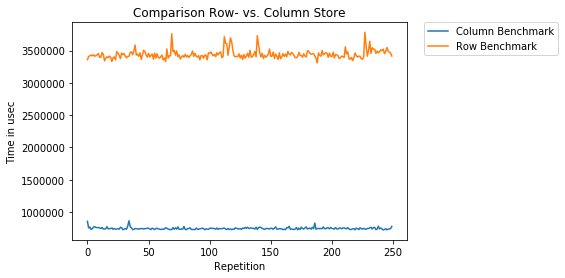

In [130]:
from util import Comparison
import re

column_benchmark = analyser.get_column_benchmark()
row_benchmark = analyser.get_row_benchmark()
comparison = Comparison(column_benchmark, row_benchmark)

comparison.set_title("Comparison Row- vs. Column Store")
comparison.compare_visually()

In [131]:
comparison.set_title("Comparison Row- vs. Column Store in usec")
comparison.compare_raw()

||Column Benchmark|Row Benchmark|
|--|--|--|
|Samples|250|250|
|Average|745541|3440525|
|Total|186385262|860131368|
|Max|864650|3783572|
|Median|743004|3426630|
|Min|723272|3309376|
|Standard Deviation|16803|67142|

Table: Comparison Row- vs. Column Store in usec


In [132]:
comparison.compare()

||Column Benchmark|Row Benchmark|
|--|--|--|
|Samples|250|250|
|Average|0.0|1.0|
|Total|0.0|1.0|
|Max|0.0|1.0|
|Median|0.0|1.0|
|Min|0.0|1.0|
|Standard Deviation|0.0|1.0|

Table: Comparison Row- vs. Column Store in usec


## Vergleich Row Column

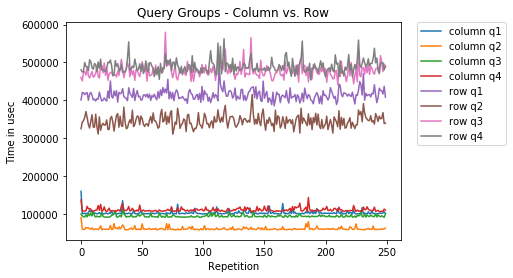

In [133]:
column_benchmark.set_prefix("column")
row_benchmark.set_prefix("row")
query_stats = column_benchmark.get_query_stats(lambda x: not re.search("\\.", x))
query_stats += row_benchmark.get_query_stats(lambda x: not re.search("\\.", x))
comparison = Comparison(*query_stats)
comparison.set_title("Query Groups - Column vs. Row")
comparison.compare_visually()

In [134]:
comparison.set_title("Query Groups - Column vs. Row in usec")
comparison.compare()

||column q1|column q2|column q3|column q4|row q1|row q2|row q3|row q4|
|--|--|--|--|--|--|--|--|--|
|Samples|250|250|250|250|250|250|250|250|
|Average|0.1|0.0|0.08|0.12|0.82|0.66|0.97|1.0|
|Total|0.1|0.0|0.08|0.12|0.82|0.66|0.97|1.0|
|Max|0.14|0.0|0.04|0.11|0.83|0.66|1.0|0.97|
|Median|0.1|0.0|0.08|0.12|0.83|0.66|0.97|1.0|
|Min|0.11|0.0|0.08|0.12|0.83|0.64|0.97|1.0|
|Standard Deviation|0.15|0.03|0.0|0.1|0.75|0.87|1.0|0.96|

Table: Query Groups - Column vs. Row in usec


### Stabilität des Benchmarks

#### Spaltenbasiert

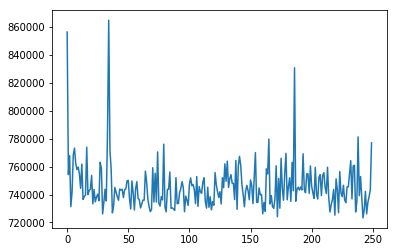

In [135]:
from matplotlib import pyplot as plt, mlab

benchmark = analyser.get_column_benchmark()
plt.plot(benchmark.get_times())
plt.show()

#### Zeilenbasiert

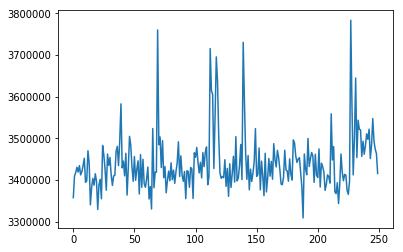

In [136]:
benchmark = analyser.get_row_benchmark()
plt.plot(benchmark.get_times())
plt.show()

## Betrachtung einzelner Queries
Im folgenden werden die einzelnen Queries des SSBM Benchmarks betrachted.

### Spaltenbasiert

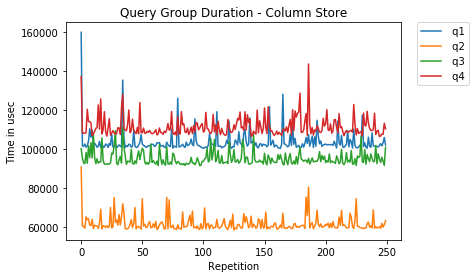

In [137]:
from util import display_table
import re

benchmark = analyser.get_column_benchmark()

query_stats = benchmark.get_query_stats(lambda x: not re.search("\\.", x))
comparison = Comparison(*query_stats)
comparison.set_title("Query Group Duration - Column Store")
comparison.compare_visually()

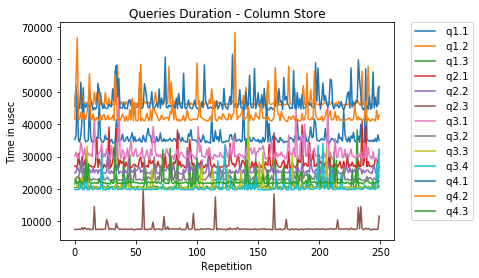

In [138]:
query_stats = benchmark.get_query_stats()
comparison = Comparison(*query_stats)
comparison.set_title("Queries Duration - Column Store")
comparison.compare_visually()

In [139]:
comparison.set_title("Queries Duration in usec - Column Store")
comparison.compare_raw()

|| q1.1| q1.2| q1.3| q2.1| q2.2| q2.3| q3.1| q3.2| q3.3| q3.4| q4.1| q4.2| q4.3|
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
|Samples|250|250|250|250|250|250|250|250|250|250|250|250|250|
|Average|35948|47001|21291|28034|25626|7920|31187|23340|21009|20611|47063|42798|22293|
|Total|8986928|11750218|5322758|7008521|6406381|1980050|7796842|5834926|5252249|5152628|11765807|10699494|5573360|
|Max|57100|58902|38241|40914|32772|19569|50800|29960|46003|34054|61559|68364|34666|
|Median|35083|46228|20512|27232|25274|7576|30438|22908|20356|19904|45636|41768|21886|
|Min|34017|45783|20243|26298|24545|7352|29022|22498|20035|19633|44153|40705|21464|
|Standard Deviation|2826|2258|2559|2402|1087|1516|2604|1174|2465|2279|3392|3468|1670|

Table: Queries Duration in usec - Column Store


In [140]:
comparison.set_title("Normalized Queries Duration - Column Store")
comparison.compare()

|| q1.1| q1.2| q1.3| q2.1| q2.2| q2.3| q3.1| q3.2| q3.3| q3.4| q4.1| q4.2| q4.3|
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
|Samples|250|250|250|250|250|250|250|250|250|250|250|250|250|
|Average|0.72|1.0|0.34|0.51|0.45|0.0|0.59|0.39|0.33|0.32|1.0|0.89|0.37|
|Total|0.72|1.0|0.34|0.51|0.45|0.0|0.59|0.39|0.33|0.32|1.0|0.89|0.37|
|Max|0.77|0.81|0.38|0.44|0.27|0.0|0.64|0.21|0.54|0.3|0.86|1.0|0.31|
|Median|0.71|1.0|0.33|0.51|0.46|0.0|0.59|0.4|0.33|0.32|0.98|0.88|0.37|
|Min|0.69|1.0|0.34|0.49|0.45|0.0|0.56|0.39|0.33|0.32|0.96|0.87|0.37|
|Standard Deviation|0.73|0.49|0.62|0.55|0.0|0.18|0.64|0.04|0.58|0.5|0.97|1.0|0.24|

Table: Normalized Queries Duration - Column Store


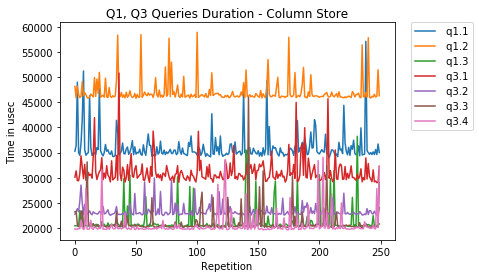

In [141]:
query_stats = benchmark.get_query_stats(lambda x: re.search("[13]\\.", x))
comparison = Comparison(*query_stats)
comparison.set_title("Q1, Q3 Queries Duration - Column Store")
comparison.compare_visually()

In [142]:
comparison.set_title("Q1, Q3 Queries Duration in usec - Column Store")
comparison.compare_raw()

|| q1.1| q1.2| q1.3| q3.1| q3.2| q3.3| q3.4|
|--|--|--|--|--|--|--|--|
|Samples|250|250|250|250|250|250|250|
|Average|35948|47001|21291|31187|23340|21009|20611|
|Total|8986928|11750218|5322758|7796842|5834926|5252249|5152628|
|Max|57100|58902|38241|50800|29960|46003|34054|
|Median|35083|46228|20512|30438|22908|20356|19904|
|Min|34017|45783|20243|29022|22498|20035|19633|
|Standard Deviation|2826|2258|2559|2604|1174|2465|2279|

Table: Q1, Q3 Queries Duration in usec - Column Store


In [143]:
comparison.set_title("Normalized Q1, Q3 Queries Duration - Column Store")
comparison.compare()

|| q1.1| q1.2| q1.3| q3.1| q3.2| q3.3| q3.4|
|--|--|--|--|--|--|--|--|
|Samples|250|250|250|250|250|250|250|
|Average|0.58|1.0|0.03|0.4|0.1|0.02|0.0|
|Total|0.58|1.0|0.03|0.4|0.1|0.02|0.0|
|Max|0.94|1.0|0.29|0.72|0.0|0.55|0.14|
|Median|0.58|1.0|0.02|0.4|0.11|0.02|0.0|
|Min|0.55|1.0|0.02|0.36|0.11|0.02|0.0|
|Standard Deviation|1.0|0.66|0.84|0.87|0.0|0.78|0.67|

Table: Normalized Q1, Q3 Queries Duration - Column Store


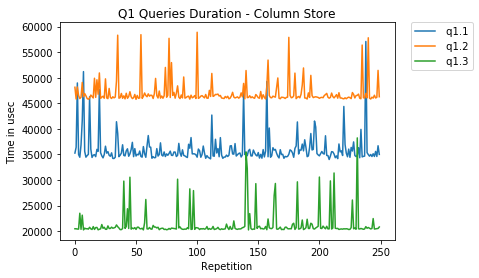

In [144]:
query_stats = benchmark.get_query_stats(lambda x: re.search("1\\.", x))
comparison = Comparison(*query_stats)
comparison.set_title("Q1 Queries Duration - Column Store")
comparison.compare_visually()

In [145]:
comparison.set_title("Q1 Queries Duration in usec - Column Store")
comparison.compare_raw()

|| q1.1| q1.2| q1.3|
|--|--|--|--|
|Samples|250|250|250|
|Average|35948|47001|21291|
|Total|8986928|11750218|5322758|
|Max|57100|58902|38241|
|Median|35083|46228|20512|
|Min|34017|45783|20243|
|Standard Deviation|2826|2258|2559|

Table: Q1 Queries Duration in usec - Column Store


In [146]:
comparison.set_title("Normalized Q1 Queries Duration - Column Store")
comparison.compare()

|| q1.1| q1.2| q1.3|
|--|--|--|--|
|Samples|250|250|250|
|Average|0.57|1.0|0.0|
|Total|0.57|1.0|0.0|
|Max|0.91|1.0|0.0|
|Median|0.57|1.0|0.0|
|Min|0.54|1.0|0.0|
|Standard Deviation|1.0|0.0|0.53|

Table: Normalized Q1 Queries Duration - Column Store


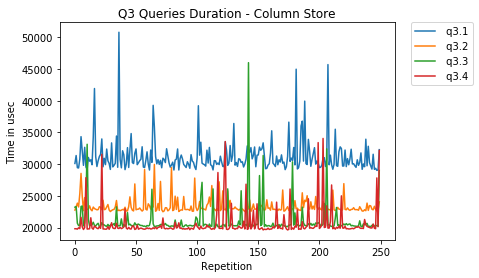

In [147]:
query_stats = benchmark.get_query_stats(lambda x: re.search("3\\.", x))
comparison = Comparison(*query_stats)
comparison.set_title("Q3 Queries Duration - Column Store")
comparison.compare_visually()

In [148]:
comparison.set_title("Q3 Queries Duration in usec - Column Store")
comparison.compare_raw()

|| q3.1| q3.2| q3.3| q3.4|
|--|--|--|--|--|
|Samples|250|250|250|250|
|Average|31187|23340|21009|20611|
|Total|7796842|5834926|5252249|5152628|
|Max|50800|29960|46003|34054|
|Median|30438|22908|20356|19904|
|Min|29022|22498|20035|19633|
|Standard Deviation|2604|1174|2465|2279|

Table: Q3 Queries Duration in usec - Column Store


In [149]:
comparison.set_title("Normalized Q3 Queries Duration - Column Store")
comparison.compare()

|| q3.1| q3.2| q3.3| q3.4|
|--|--|--|--|--|
|Samples|250|250|250|250|
|Average|1.0|0.26|0.04|0.0|
|Total|1.0|0.26|0.04|0.0|
|Max|1.0|0.0|0.77|0.2|
|Median|1.0|0.29|0.04|0.0|
|Min|1.0|0.31|0.04|0.0|
|Standard Deviation|1.0|0.0|0.9|0.77|

Table: Normalized Q3 Queries Duration - Column Store


## Zeilenbasiert

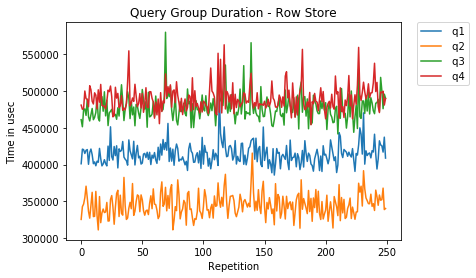

In [150]:
benchmark = analyser.get_row_benchmark()
query_stats = benchmark.get_query_stats(lambda x: not re.search("\\.", x))
comparison = Comparison(*query_stats)
comparison.set_title("Query Group Duration - Row Store")
comparison.compare_visually()

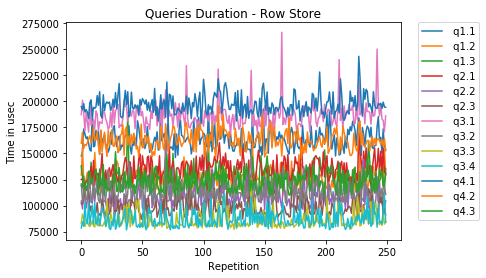

In [151]:
query_stats = benchmark.get_query_stats()
comparison = Comparison(*query_stats)
comparison.set_title("Queries Duration - Row Store")
comparison.compare_visually()

In [152]:
comparison.set_title("Queries Duration in usec - Row Store")
comparison.compare_raw()

|| q1.1| q1.2| q1.3| q2.1| q2.2| q2.3| q3.1| q3.2| q3.3| q3.4| q4.1| q4.2| q4.3|
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
|Samples|250|250|250|250|250|250|250|250|250|250|250|250|250|
|Average|163561|126250|124690|134934|108385|99145|186910|113753|85761|87226|196885|162725|123761|
|Total|40890224|31562388|31172456|33733428|27096217|24786287|46727434|28438199|21440372|21806416|49221333|40681216|30940292|
|Max|199722|158806|189423|169259|161732|135105|266319|150007|126138|111410|243249|196037|151664|
|Median|162776|126463|123551|133905|106296|96250|186316|111914|82665|83754|195018|161624|123035|
|Min|146097|110390|109108|117100|95119|86811|167800|101690|77119|76638|178381|145252|109697|
|Standard Deviation|10063|8698|10744|10160|9946|9561|12201|9012|7843|8332|9603|8895|9093|

Table: Queries Duration in usec - Row Store


In [153]:
comparison.set_title("Normalized Queries Duration - Row Store")
comparison.compare()

|| q1.1| q1.2| q1.3| q2.1| q2.2| q2.3| q3.1| q3.2| q3.3| q3.4| q4.1| q4.2| q4.3|
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
|Samples|250|250|250|250|250|250|250|250|250|250|250|250|250|
|Average|0.7|0.36|0.35|0.44|0.2|0.12|0.91|0.25|0.0|0.01|1.0|0.69|0.34|
|Total|0.7|0.36|0.35|0.44|0.2|0.12|0.91|0.25|0.0|0.01|1.0|0.69|0.34|
|Max|0.57|0.31|0.5|0.37|0.32|0.15|1.0|0.25|0.1|0.0|0.85|0.55|0.26|
|Median|0.71|0.39|0.36|0.46|0.21|0.12|0.92|0.26|0.0|0.01|1.0|0.7|0.36|
|Min|0.68|0.33|0.32|0.4|0.18|0.1|0.9|0.25|0.0|0.0|1.0|0.67|0.32|
|Standard Deviation|0.51|0.2|0.67|0.53|0.48|0.39|1.0|0.27|0.0|0.11|0.4|0.24|0.29|

Table: Normalized Queries Duration - Row Store


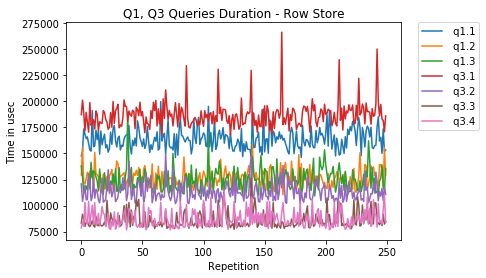

In [154]:
query_stats = benchmark.get_query_stats(lambda x: re.search("[13]\\.", x))
comparison = Comparison(*query_stats)
comparison.set_title("Q1, Q3 Queries Duration - Row Store")
comparison.compare_visually()

In [155]:
comparison.set_title("Q1, Q3 Queries Duration in usec - Row Store")
comparison.compare_raw()

|| q1.1| q1.2| q1.3| q3.1| q3.2| q3.3| q3.4|
|--|--|--|--|--|--|--|--|
|Samples|250|250|250|250|250|250|250|
|Average|163561|126250|124690|186910|113753|85761|87226|
|Total|40890224|31562388|31172456|46727434|28438199|21440372|21806416|
|Max|199722|158806|189423|266319|150007|126138|111410|
|Median|162776|126463|123551|186316|111914|82665|83754|
|Min|146097|110390|109108|167800|101690|77119|76638|
|Standard Deviation|10063|8698|10744|12201|9012|7843|8332|

Table: Q1, Q3 Queries Duration in usec - Row Store


In [156]:
comparison.set_title("Normalized Q1, Q3 Queries Duration - Row Store")
comparison.compare()

|| q1.1| q1.2| q1.3| q3.1| q3.2| q3.3| q3.4|
|--|--|--|--|--|--|--|--|
|Samples|250|250|250|250|250|250|250|
|Average|0.77|0.4|0.38|1.0|0.28|0.0|0.01|
|Total|0.77|0.4|0.38|1.0|0.28|0.0|0.01|
|Max|0.57|0.31|0.5|1.0|0.25|0.1|0.0|
|Median|0.77|0.42|0.39|1.0|0.28|0.0|0.01|
|Min|0.76|0.37|0.36|1.0|0.27|0.01|0.0|
|Standard Deviation|0.51|0.2|0.67|1.0|0.27|0.0|0.11|

Table: Normalized Q1, Q3 Queries Duration - Row Store


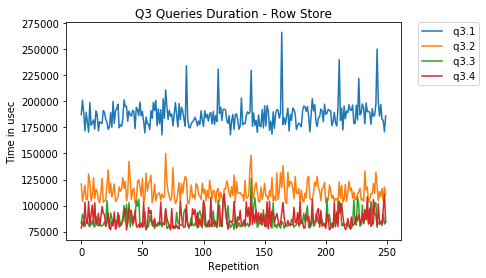

In [157]:
query_stats = benchmark.get_query_stats(lambda x: re.search("3\\.", x))
comparison = Comparison(*query_stats)
comparison.set_title("Q3 Queries Duration - Row Store")
comparison.compare_visually()

In [158]:
comparison.set_title("Q3 Queries Duration in usec - Row Store")
comparison.compare_raw()

|| q3.1| q3.2| q3.3| q3.4|
|--|--|--|--|--|
|Samples|250|250|250|250|
|Average|186910|113753|85761|87226|
|Total|46727434|28438199|21440372|21806416|
|Max|266319|150007|126138|111410|
|Median|186316|111914|82665|83754|
|Min|167800|101690|77119|76638|
|Standard Deviation|12201|9012|7843|8332|

Table: Q3 Queries Duration in usec - Row Store


In [159]:
comparison.set_title("Normalized Q3 Queries Duration - Column Store")
comparison.compare()

|| q3.1| q3.2| q3.3| q3.4|
|--|--|--|--|--|
|Samples|250|250|250|250|
|Average|1.0|0.28|0.0|0.01|
|Total|1.0|0.28|0.0|0.01|
|Max|1.0|0.25|0.1|0.0|
|Median|1.0|0.28|0.0|0.01|
|Min|1.0|0.27|0.01|0.0|
|Standard Deviation|1.0|0.27|0.0|0.11|

Table: Normalized Q3 Queries Duration - Column Store


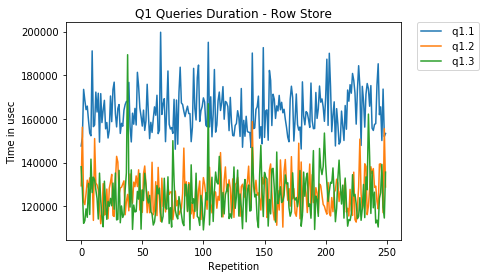

In [160]:
query_stats = benchmark.get_query_stats(lambda x: re.search("1\\.", x))
comparison = Comparison(*query_stats)
comparison.set_title("Q1 Queries Duration - Row Store")
comparison.compare_visually()

In [161]:
comparison.set_title("Q1 Queries Duration in usec - Row Store")
comparison.compare_raw()

|| q1.1| q1.2| q1.3|
|--|--|--|--|
|Samples|250|250|250|
|Average|163561|126250|124690|
|Total|40890224|31562388|31172456|
|Max|199722|158806|189423|
|Median|162776|126463|123551|
|Min|146097|110390|109108|
|Standard Deviation|10063|8698|10744|

Table: Q1 Queries Duration in usec - Row Store


In [162]:
comparison.set_title("Normalized Q1 Queries Duration - Column Store")
comparison.compare()

|| q1.1| q1.2| q1.3|
|--|--|--|--|
|Samples|250|250|250|
|Average|1.0|0.04|0.0|
|Total|1.0|0.04|0.0|
|Max|1.0|0.0|0.75|
|Median|1.0|0.07|0.0|
|Min|1.0|0.03|0.0|
|Standard Deviation|0.67|0.0|1.0|

Table: Normalized Q1 Queries Duration - Column Store


## Indizes

### Vergleich von allen Messwerten

In [163]:
column_benchmark = analyser.get_column_benchmark()
index_column_benchmark = analyser.get_column_benchmark_I()
row_benchmark = analyser.get_row_benchmark()
index_row_benchmark = analyser.get_row_benchmark_I()
comparison = Comparison(column_benchmark, index_column_benchmark, row_benchmark, index_row_benchmark)

comparison.compare_raw()

||Column Benchmark|Column Benchmark with Index|Row Benchmark|Row Benchmark with Index|
|--|--|--|--|--|
|Samples|250|250|250|250|
|Average|745541|561706|3440525|2881318|
|Total|186385262|140426416|860131368|720329574|
|Max|864650|602952|3783572|3186465|
|Median|743004|560251|3426630|2877612|
|Min|723272|544458|3309376|2780084|
|Standard Deviation|16803|8690|67142|51352|


In [164]:
comparison.compare()

||Column Benchmark|Column Benchmark with Index|Row Benchmark|Row Benchmark with Index|
|--|--|--|--|--|
|Samples|250|250|250|250|
|Average|0.06|0.0|1.0|0.81|
|Total|0.06|0.0|1.0|0.81|
|Max|0.08|0.0|1.0|0.81|
|Median|0.06|0.0|1.0|0.81|
|Min|0.06|0.0|1.0|0.81|
|Standard Deviation|0.14|0.0|1.0|0.73|


### Spaltenbasiert

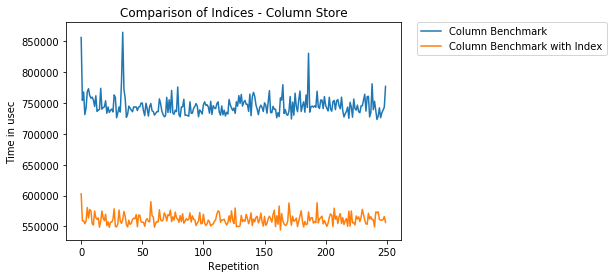

In [165]:
column_benchmark = analyser.get_column_benchmark()
index_column_benchmark = analyser.get_column_benchmark_I()
comparison = Comparison(column_benchmark, index_column_benchmark)

comparison.set_title("Comparison of Indices - Column Store")
comparison.compare_visually()

In [166]:
comparison.set_title("Comparison of Indices in usec - Column Store")
comparison.compare_raw()

||Column Benchmark|Column Benchmark with Index|
|--|--|--|
|Samples|250|250|
|Average|745541|561706|
|Total|186385262|140426416|
|Max|864650|602952|
|Median|743004|560251|
|Min|723272|544458|
|Standard Deviation|16803|8690|

Table: Comparison of Indices in usec - Column Store


### Zeilenbasiert

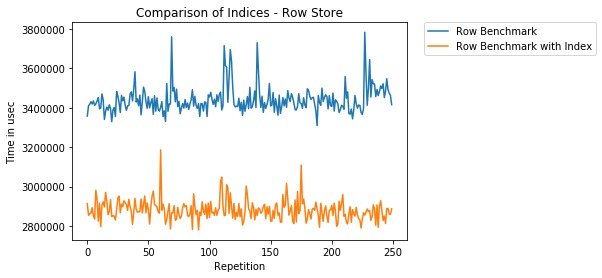

In [167]:
row_benchmark = analyser.get_row_benchmark()
index_row_benchmark = analyser.get_row_benchmark_I()
comparison = Comparison(row_benchmark, index_row_benchmark)

comparison.set_title("Comparison of Indices - Row Store")
comparison.compare_visually()

In [168]:
comparison.set_title("Comparison of Indices in usec - Row Store")
comparison.compare_raw()

||Row Benchmark|Row Benchmark with Index|
|--|--|--|
|Samples|250|250|
|Average|3440525|2881318|
|Total|860131368|720329574|
|Max|3783572|3186465|
|Median|3426630|2877612|
|Min|3309376|2780084|
|Standard Deviation|67142|51352|

Table: Comparison of Indices in usec - Row Store


## Hardware Vergleich

### Einstellungen

In [169]:
a6 = Analyser(LOG_PATH_ROOT + "12gb6cores.log")
a4 = Analyser(LOG_PATH_ROOT + "i7-4core.log")
a2 = Analyser(LOG_PATH_ROOT + "i7-2core.log")

aGb12 = Analyser(LOG_PATH_ROOT + "12gb6cores.log")
aGb8 = Analyser(LOG_PATH_ROOT + "8gb6cores.log")
aGb6 = Analyser(LOG_PATH_ROOT + "6gb6cores.log")

### Spaltenbasiert
#### CPU

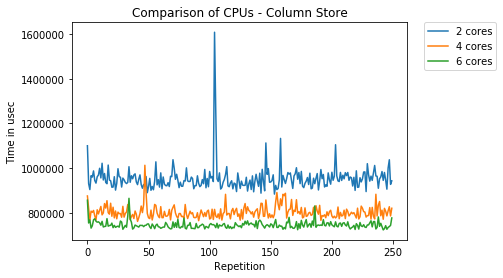

In [170]:
b6 = a6.get_column_benchmark()
b4 = a4.get_column_benchmark()
b2 = a2.get_column_benchmark()

b6.set_name("6 cores")
b4.set_name("4 cores")
b2.set_name("2 cores")

comparison = Comparison(b2, b4, b6)
comparison.set_title("Comparison of CPUs - Column Store")
comparison.compare_visually()

In [171]:
comparison.set_title("Comparison of CPUs in usec - Column Store")
comparison.compare_raw()

||2 cores|4 cores|6 cores|
|--|--|--|--|
|Samples|250|250|250|
|Average|953132|803181|745541|
|Total|238283078|200795162|186385262|
|Max|1607694|1012496|864650|
|Median|945048|796784|743004|
|Min|883485|761425|723272|
|Standard Deviation|58230|28873|16803|

Table: Comparison of CPUs in usec - Column Store


In [172]:
comparison.set_title("Normalized Comparison of CPUs - Column Store")
comparison.compare()

||2 cores|4 cores|6 cores|
|--|--|--|--|
|Samples|250|250|250|
|Average|1.0|0.28|0.0|
|Total|1.0|0.28|0.0|
|Max|1.0|0.2|0.0|
|Median|1.0|0.27|0.0|
|Min|1.0|0.24|0.0|
|Standard Deviation|1.0|0.29|0.0|

Table: Normalized Comparison of CPUs - Column Store


#### RAM

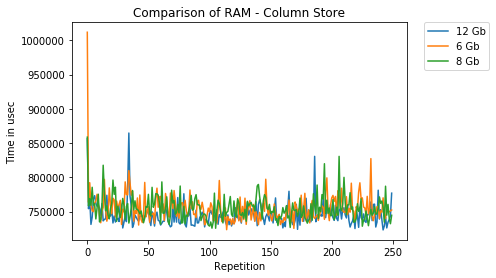

In [173]:
b12 = aGb12.get_column_benchmark()
b8 = aGb8.get_column_benchmark()
b6 = aGb6.get_column_benchmark()

b12.set_name("12 Gb")
b8.set_name("8 Gb")
b6.set_name("6 Gb")

comparison = Comparison(b6, b8, b12)
comparison.set_title("Comparison of RAM - Column Store")
comparison.compare_visually()

In [174]:
comparison.set_title("Comparison of RAM in usec - Column Store")
comparison.compare_raw()

||12 Gb|6 Gb|8 Gb|
|--|--|--|--|
|Samples|250|250|250|
|Average|745541|755477|754689|
|Total|186385262|188869128|188672342|
|Max|864650|1011697|858595|
|Median|743004|751938|752236|
|Min|723272|723644|725710|
|Standard Deviation|16803|23041|17619|

Table: Comparison of RAM in usec - Column Store


In [175]:
comparison.set_title("Normalized Comparison of RAM - Column Store")
comparison.compare()

||12 Gb|6 Gb|8 Gb|
|--|--|--|--|
|Samples|250|250|250|
|Average|0.0|1.0|0.92|
|Total|0.0|1.0|0.92|
|Max|0.04|1.0|0.0|
|Median|0.0|0.97|1.0|
|Min|0.0|0.15|1.0|
|Standard Deviation|0.0|1.0|0.13|

Table: Normalized Comparison of RAM - Column Store


### Zeilenbasiert
#### CPU

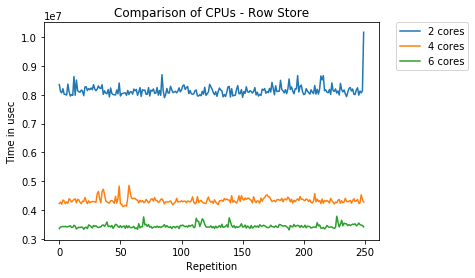

In [176]:
b6 = a6.get_row_benchmark()
b4 = a4.get_row_benchmark()
b2 = a2.get_row_benchmark()

b6.set_name("6 cores")
b4.set_name("4 cores")
b2.set_name("2 cores")

comparison = Comparison(b2, b4, b6)
comparison.set_title("Comparison of CPUs - Row Store")
comparison.compare_visually()

In [177]:
comparison.set_title("Comparison of CPUs in usec - Row Store")
comparison.compare_raw()

||2 cores|4 cores|6 cores|
|--|--|--|--|
|Samples|250|250|250|
|Average|8145029|4331021|3440525|
|Total|2036257355|1082755311|860131368|
|Max|10169894|4856142|3783572|
|Median|8121576|4317812|3426630|
|Min|7898365|4118623|3309376|
|Standard Deviation|190911|97686|67142|

Table: Comparison of CPUs in usec - Row Store


#### RAM

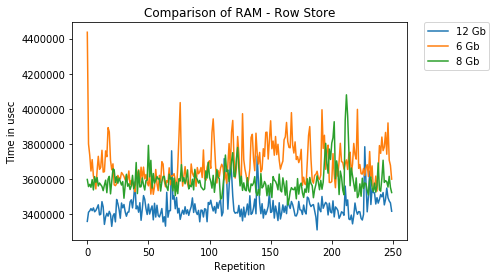

In [178]:
b12 = aGb12.get_row_benchmark()
b8 = aGb8.get_row_benchmark()
b6 = aGb6.get_row_benchmark()

b12.set_name("12 Gb")
b8.set_name("8 Gb")
b6.set_name("6 Gb")

comparison = Comparison(b6, b8, b12)
comparison.set_title("Comparison of RAM - Row Store")
comparison.compare_visually()

In [179]:
comparison.set_title("Comparison of RAM in usec - Row Store")
comparison.compare_raw()

||12 Gb|6 Gb|8 Gb|
|--|--|--|--|
|Samples|250|250|250|
|Average|3440525|3685820|3591003|
|Total|860131368|921454916|897750831|
|Max|3783572|4436182|4079505|
|Median|3426630|3660467|3577376|
|Min|3309376|3512252|3451791|
|Standard Deviation|67142|114193|79002|

Table: Comparison of RAM in usec - Row Store


In [180]:
comparison.set_title("Normalized Comparison of RAM - Row Store")
comparison.compare()

||12 Gb|6 Gb|8 Gb|
|--|--|--|--|
|Samples|250|250|250|
|Average|0.0|1.0|0.61|
|Total|0.0|1.0|0.61|
|Max|0.0|1.0|0.45|
|Median|0.0|1.0|0.64|
|Min|0.0|1.0|0.7|
|Standard Deviation|0.0|1.0|0.25|

Table: Normalized Comparison of RAM - Row Store
